## London Tourism Analysis (logstic regression draft)

### Group members:
- Ziyi Zhao
- Hongbo Liu
- Erya Ouyang
- Jingze Zhang
- Leo Liu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
london = pd.read_csv('london_index.csv')

In [3]:
london.head(5)

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,PI,econ,busi,gove,educ,heal,safe,pers,soci,envi
0,2007,Q1,Belgium,<15 nights,Air,Holiday,0.753385,0.087581,0.753385,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
1,2007,Q1,Belgium,<15 nights,Air,Business,4.625445,1.555299,6.869618,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
2,2007,Q1,Belgium,<15 nights,Air,VFR,1.225540,0.048458,1.793118,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,1.023070,0.208063,1.776455,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,6.439640,0.438086,8.448400,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929


In [4]:
london_2 = london.copy()

In [5]:
for col_name in london_2.columns[6:19]:
    new_col_name = col_name + '_std'
    london_2[new_col_name] = (london_2[col_name] - london_2[col_name].mean())/london_2[col_name].std()

In [6]:
london_2 = london_2.drop(london_2.columns[6:19],axis=1)

In [7]:
london_2.head()

,year,quarter,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
0,2007,Q1,Belgium,<15 nights,Air,Holiday,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
1,2007,Q1,Belgium,<15 nights,Air,Business,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
2,2007,Q1,Belgium,<15 nights,Air,VFR,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508


In [8]:
london_3 = london_2.drop(['quarter'], axis = 1)

In [9]:
london_3.count()

year          37174
market        37174
dur_stay      37174
mode          37174
purpose       37174
visits_std    37174
spend_std     37174
nights_std    37174
PI_std        37174
econ_std      37174
busi_std      37174
gove_std      37174
educ_std      37174
heal_std      37174
safe_std      37174
pers_std      37174
soci_std      37174
envi_std      37174
dtype: int64

In [10]:
london_3.tail()

,year,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
37169,2017,Other Africa,<15 nights,Air,VFR,0.180685,-0.098125,0.426652,-1.922495,-2.230903,-1.659882,-1.565231,-2.733936,-2.413469,-1.644649,-1.09851,-1.159979,-0.970676
37170,2017,Other Africa,<15 nights,Air,Miscellaneous,-0.457178,-0.341626,-0.452456,-1.922495,-2.230903,-1.659882,-1.565231,-2.733936,-2.413469,-1.644649,-1.09851,-1.159979,-0.970676
37171,2017,Other Africa,15+ nights,Air,Business,-0.440588,-0.291647,-0.362652,-1.922495,-2.230903,-1.659882,-1.565231,-2.733936,-2.413469,-1.644649,-1.09851,-1.159979,-0.970676
37172,2017,Other Africa,15+ nights,Air,VFR,-0.022455,-0.128581,3.466358,-1.922495,-2.230903,-1.659882,-1.565231,-2.733936,-2.413469,-1.644649,-1.09851,-1.159979,-0.970676
37173,2017,Other Africa,15+ nights,Tunnel,Study,-0.323026,1.134992,2.569771,-1.922495,-2.230903,-1.659882,-1.565231,-2.733936,-2.413469,-1.644649,-1.09851,-1.159979,-0.970676


In [11]:
london_3['dur_stay'] = london_3['dur_stay'].replace({'<15 nights': 0, '15+  nights':1},value=None)

In [12]:
Y = london_3['dur_stay']

In [13]:
X = london_3.drop(['dur_stay'], axis = 1)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [15]:
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = labelencoder_X.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = labelencoder_X.fit_transform(X.iloc[:, 3])

In [16]:
X.head()

,year,market,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
0,2007,4,0,1,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
1,2007,4,0,0,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
2,2007,4,0,4,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
3,2007,4,0,2,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
4,2007,4,1,1,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508


In [17]:
onehotencoder = OneHotEncoder(categorical_features = [1,2,3])
X = onehotencoder.fit_transform(X).toarray()

In [18]:
# Encoding the Dependent Variable
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [19]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Applying PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [22]:
components = pca.components_

In [23]:
components.shape

(12, 83)

In [24]:
explained_variance

array([0.39482269, 0.3187573 , 0.08843373, 0.03031014, 0.02058846,
       0.01736936, 0.01417925, 0.01296643, 0.01146528, 0.01066517,
       0.00924566, 0.00796348])

## Logistic Regression Model

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
Y_pred = classifier.predict(X_test)

### Confusion matrix

Logistic Regression Confusion matrix, without normalization
[[7479  117]
 [ 624 1074]]
Logistic Regression Normalized confusion matrix
[[0.98 0.02]
 [0.37 0.63]]


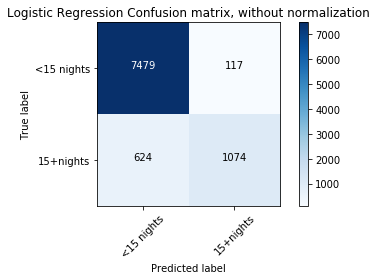

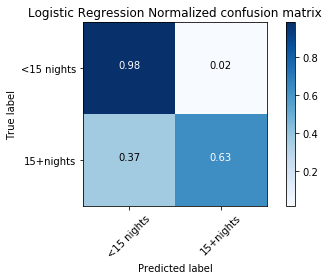

In [27]:
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['<15 nights','15+nights']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Logistic Regression Normalized confusion matrix")
    else:
        print('Logistic Regression Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic Regression Normalized confusion matrix')

plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.92      0.98      0.95      7596
  15+nights       0.90      0.63      0.74      1698

avg / total       0.92      0.92      0.91      9294



### ROC curve

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_true = Y_test
y_scores = classifier.fit(X_train, Y_train).decision_function(X_test) 
roc_auc_score(y_true, y_scores)

0.9526831585156406

In [30]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

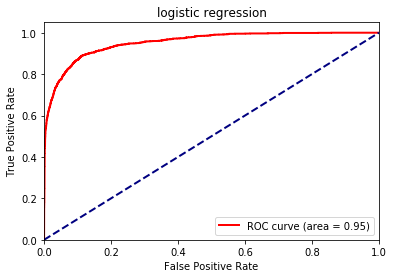

In [31]:
#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic regression')
plt.legend(loc="lower right")
plt.show()

### Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.922381916666836

In [33]:
accuracies.std()

0.002781022515616366

### Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
              {'penalty':['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

We didn't change solver because liblinear is good for small datasets.

In [35]:
best_accuracy

0.9239598278335724

In [36]:
best_parameters

{'C': 10, 'penalty': 'l1'}

## Build a new model

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression(C = 10, penalty = 'l1', random_state = 0)
classifier_new.fit(X_train, Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
Y_pred_new = classifier_new.predict(X_test)

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_new, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.9239602247009924

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_new, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.93      0.98      0.95      7596
  15+nights       0.89      0.65      0.75      1698

avg / total       0.92      0.92      0.92      9294



In [41]:
Y_pred_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
Y_pred_probability = classifier_new.predict_proba(X_test)

In [43]:
Y_pred_probability

array([[0.77, 0.23],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.87, 0.13],
       [0.92, 0.08],
       [0.99, 0.01]])

In [44]:
Y_pred_log = classifier_new.predict_log_proba(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1356: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [45]:
Y_pred_log

array([[-0.26, -1.49],
       [-0.04, -3.37],
       [-0.01, -5.04],
       ...,
       [-0.14, -2.05],
       [-0.09, -2.48],
       [-0.01, -5.21]])

## Adding columns

In [46]:
X = pca.transform(X)

In [47]:
Predict = classifier_new.predict(X)

In [48]:
Predict.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,


In [49]:
Probability = classifier_new.predict_proba(X)

In [50]:
Probability.tolist()

[[0.9591019871461384, 0.0408980128538616],
 [0.9999499579437766, 5.004205622342693e-05],
 [0.9843598027346008, 0.015640197265399194],
 [0.9763117598391626, 0.023688240160837315],
 [0.9999924645918813, 7.535408118719741e-06],
 [0.999999999888009, 1.1199098236265628e-10],
 [0.9999999995825247, 4.1747528287518153e-10],
 [0.9999993699528122, 6.300471877642448e-07],
 [0.9790388187406616, 0.020961181259338435],
 [0.9001807654130087, 0.0998192345869913],
 [0.9793954244945955, 0.020604575505404475],
 [0.9684899646977976, 0.03151003530220244],
 [0.9763872944368341, 0.023612705563165845],
 [0.9745616363167361, 0.025438363683263902],
 [0.8729864639694678, 0.1270135360305322],
 [0.8466190551388704, 0.1533809448611296],
 [0.9168557451138081, 0.08314425488619194],
 [0.4265468913980782, 0.5734531086019218],
 [0.9872218941643471, 0.01277810583565286],
 [0.9642454243389809, 0.035754575661019174],
 [0.9414696788584997, 0.05853032114150024],
 [0.9520489428134838, 0.04795105718651612],
 [0.909792347271833

In [51]:
london_3['predict'] = Predict.tolist()

In [52]:
london_3.head()

,year,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std,predict
0,2007,Belgium,0,Air,Holiday,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0
1,2007,Belgium,0,Air,Business,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0
2,2007,Belgium,0,Air,VFR,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0
3,2007,Belgium,0,Air,Miscellaneous,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0
4,2007,Belgium,0,Sea,Holiday,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0


In [53]:
london_3['<15 days probability', '15+ days probability'] = Probability.tolist()

In [54]:
london_3.head()

,year,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std,predict,"(<15 days probability, 15+ days probability)"
0,2007,Belgium,0,Air,Holiday,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0,"[0.9591019871461384, 0.0408980128538616]"
1,2007,Belgium,0,Air,Business,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0,"[0.9999499579437766, 5.004205622342693e-05]"
2,2007,Belgium,0,Air,VFR,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0,"[0.9843598027346008, 0.015640197265399194]"
3,2007,Belgium,0,Air,Miscellaneous,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0,"[0.9763117598391626, 0.023688240160837315]"
4,2007,Belgium,0,Sea,Holiday,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508,0,"[0.9999924645918813, 7.535408118719741e-06]"


In [55]:
import os
os.getcwd()

'C:\\Users\\liuho'

In [56]:
london_3.to_csv("london tourism prediction.csv",index=False)

In [57]:
# from sklearn.externals import joblib

In [58]:
# joblib.dump(classifier_new, 'D:\\Business Analytics\\6217 Practicum\\data.pkl')

In [59]:
# tourism_model = joblib.load('D:\\Business Analytics\\6217 Practicum\\data.pkl') 

In [60]:
# tourism_model.fit(X,Y)